<h1 class="alert alert-info">Epidemium RAMP: Cancer Mortality Prediction<br/>
<small>Djalel Benbouzid, Edouard Debonneuil, Frédéric Kozlowski<br/>
Cancer Baseline contributors: http://wiki.epidemium.cc/wiki/Baseline#Contributors<br/>
Partner and software provider: <a href="http://www.datascience-paris-saclay.fr">Paris Saclay Center for Data Science</a>
</small></h1></div>

<h1 class="alert alert-success">Introduction</h1>

In this second episode of Epidemium RAMP, we focus on cancers of the digestive tract. We propose to build predictive models of the evolution of such cancers, to project their evolution over time and to reveal some of the determinants.

As some cancers reach different organs, do they maintain epidemiological links? In particular, challengers will investigate the existence of statistical correlations between the epidemiology of a wide typology of cancer and mortality from digestive cancers.

The goal of this challenge is to predict the different mortality rates of the cancers related to the digestive systems and to mine the different interactions these cancers might have with other types of cancers.

## Tools & Setup

- *The simple way*: Install the Anaconda python distribution https://www.continuum.io/downloads
- *The fine-grained way:*. Install each of the following tools
    - Python
    - Jupyter
    - Scikit-learn
    - Pandas 
    - seaborn

### Important

Please update your packages if you already have them installed.  
You can do that directly within the notebook by executing the following cell

<h1 class="alert alert-success">Imports</h1>

In [5]:
%matplotlib inline

In [6]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [7]:
pd.options.display.max_columns = None

In [8]:
pd.options.display.max_rows = 300

<h1 class="alert alert-success">Data description</h1>

The following table contains the description of the different columns in the dataset

In [10]:
meta_df = pd.read_csv('data/metadata.csv.gz', usecols=['metadata_name', 'metadata_family', 'metadata_definition', 'metadata_unit'])
meta_df.head(10)

,metadata_name,metadata_family,metadata_definition,metadata_unit
0,g_population,demographics,number of males/females living in the geograph...,people
1,population,demographics,number of people living in the geographic area,people
2,area,geographics,size of the geographic area,square kilometers
3,"g_All cancers (C00-97,B21)",cancer mortality rate,mortality rate from any type of cancer,per 10 million persons
4,g_All cancers but lung (C00-97/C33-34),cancer mortality rate,mortality rate from that type of cancer,per 10 million persons
5,g_Bladder (C67),cancer mortality rate,mortality rate from that type of cancer,per 10 million persons
6,"g_Brain, central nervous system (C70-72)",cancer mortality rate,mortality rate from that type of cancer,per 10 million persons
7,g_Breast (C50),cancer mortality rate,mortality rate from that type of cancer,per 10 million persons
8,g_Cervix uteri (C53),cancer mortality rate,mortality rate from that type of cancer,per 10 million persons
9,g_Colon (C18),cancer mortality rate,mortality rate from that type of cancer,per 10 million persons


In [12]:
data_df = pd.read_csv('data/train.csv.bz2')

In [13]:
data_df.head(100)

,country,ageMin,ageMax,year,gender,g_Bladder (C67),"g_Brain, central ner",g_Breast (C50),g_Cervix uteri (C53),g_mBladder (C67),"g_mBrain, central nervous system (C70-72)",g_mBreast (C50),g_mColon (C18),"g_mColon, rectum and anus (C18-21)",g_mCorpus uteri (C54),g_mGallbladder (C23-24),g_mHodgkin lymphoma (C81),g_mIntestine (C17-21),g_mKidney (C64),g_mLeukaemia (C91-95),"g_mLip, oral cavity and pharynx (C00-14)","g_mLip, oral cavity, pharynx, larynx and oesophagus (C00-15,C32)",g_mLiver (C22),g_mMelanoma of skin (C43),g_mMesothelioma (C45),g_mMultiple myeloma (C88+C90),g_mNasopharynx (C11),"g_mNon-Hodgkin lymphoma (C82-85,C96)",g_mOesophagus (C15),g_mUterus (C53-55),incidence C00,incidence C00-14,incidence C00-96,"incidence C00-96, C44",incidence C00-97,"incidence C00-97,C44",incidence C01,incidence C01-02,incidence C02,incidence C03,incidence C03-06,incidence C04,incidence C05,incidence C06,incidence C07,incidence C07-08,incidence C08,incidence C09,incidence C10,incidence C11,incidence C12,incidence C13,incidence C14,incidence C15,"incidence C15.0,3","incidence C15.1,4","incidence C15.2,5",incidence C15-26,incidence C15.8-9,incidence C16,incidence C16.0,incidence C16.1,incidence C16.2,incidence C16.3-4,incidence C16.5-9,incidence C17,incidence C18,incidence C18.0-2,incidence C18.3-5,incidence C18.6,incidence C18.7,incidence C18.8-9,incidence C19,incidence C20,incidence C21,incidence C22,incidence C23,incidence C24,incidence C25,incidence C26,incidence C30,incidence C30-39,incidence C31,incidence C32,incidence C33,incidence C34,incidence C37,incidence C38,incidence C39,incidence C40,incidence C40-41,incidence C41,incidence C43,incidence C43.0-4,incidence C43-44,incidence C43.5,incidence C43.6,incidence C43.7,incidence C43.8-9,incidence C44,incidence C45,incidence C45-49,incidence C46,incidence C47,incidence C48,incidence C49,incidence C50,incidence C51,incidence C51-58,incidence C52,incidence C53,incidence C54,incidence C55,incidence C56,incidence C57,incidence C57.0,incidence C57.1-9,incidence C58,incidence C60,incidence C60-63,incidence C61,incidence C62,incidence C63,incidence C64,incidence C64-68,incidence C65,incidence C66,incidence C67,incidence C68,incidence C69,incidence C69-72,incidence C70,incidence C70-72,incidence C71,incidence C71-72,incidence C72,incidence C72.0-1,"incidence C72.0,1",incidence C72.2-5,incidence C72.8-9,incidence C73,incidence C73-75,incidence C74,incidence C75,"incidence C80,C97",incidence C81,incidence C81.0,incidence C81.1,incidence C81.2,incidence C81.3,"incidence C81.7,9",incidence C81-96,"incidence C82-85,C96","incidence C82,C83.0-6,8-9,C84.1-5,C85,C96",incidence C83.7,incidence C84.0,incidence C88,incidence C90,incidence C91,incidence C91.0,incidence C91.1,incidence C91.2-7,incidence C91.9,incidence C91-95,"incidence C92.0, C93.0, C94.0,C94.2,C94.4-5","incidence C92.0,C93.0,C94.0,C94.2,C94.4-5","incidence C92.1, C93.1, C94.1","incidence C92.1,C93.1,C94.1","incidence C92.2-7, C93.2-7,C94.3,C94.7","incidence C92.2-7,C93.2,C93.7,C94.3,C94.7",incidence C92-94,"incidence C92.9, C93.9","incidence C92.9,C93,9",incidence C95,incidence C95.0,incidence C95.1,incidence C95.2-7,"incidence C95.2,7",incidence C95.9,incidence X15.0,incidence X15.1,incidence X15.2,incidence X15.3,incidence X15.4,incidence X15.5,incidence X15.6,incidence X21.0,incidence X21.1,incidence X21.2,incidence X21.3,incidence X21.4,incidence X21.5,incidence X21.6,incidence X22.0,incidence X22.1,incidence X22.2,incidence X22.3,incidence X22.4,incidence X22.5,incidence X22.6,incidence X22.7,incidence X22.8,incidence X34.0,incidence X34.1,incidence X34.2,incidence X34.3,incidence X34.4,incidence X34.5,incidence X34.6,incidence X34.7,incidence X40-41.0,incidence X40-41.06,incidence X40-41.1,incidence X40-41.2,incidence X40-41.3,incidence X40-41.4,incidence X40-41.5,incidence X40-41.6,incidence X53.0,incidence X53.1,incidence X53.2,incidence X53.3,incidence X53.4,incidence X53.5,incidence X53.6,incidence X54.0,incidence X54.1,incidence X54

In [14]:
data_df.shape

(16000, 291)

Reading the names of the target columns

In [15]:
target_cols = np.loadtxt('data/target.dta', dtype=bytes, delimiter=';').astype(str)

In [16]:
target_cols

array(['g_mColon (C18)', 'g_mLiver (C22)', 'g_mGallbladder (C23-24)',
       'g_mColon, rectum and anus (C18-21)', 'g_mIntestine (C17-21)'], 
      dtype='|S34')

In [17]:
data_df.describe()

/Users/kegl/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,ageMin,ageMax,year,g_Bladder (C67),"g_Brain, central ner",g_Breast (C50),g_Cervix uteri (C53),g_mBladder (C67),"g_mBrain, central nervous system (C70-72)",g_mBreast (C50),g_mColon (C18),"g_mColon, rectum and anus (C18-21)",g_mCorpus uteri (C54),g_mGallbladder (C23-24),g_mHodgkin lymphoma (C81),g_mIntestine (C17-21),g_mKidney (C64),g_mLeukaemia (C91-95),"g_mLip, oral cavity and pharynx (C00-14)","g_mLip, oral cavity, pharynx, larynx and oesophagus (C00-15,C32)",g_mLiver (C22),g_mMelanoma of skin (C43),g_mMesothelioma (C45),g_mMultiple myeloma (C88+C90),g_mNasopharynx (C11),"g_mNon-Hodgkin lymphoma (C82-85,C96)",g_mOesophagus (C15),g_mUterus (C53-55),incidence C00,incidence C00-14,incidence C00-96,"incidence C00-96, C44",incidence C00-97,"incidence C00-97,C44",incidence C01,incidence C01-02,incidence C02,incidence C03,incidence C03-06,incidence C04,incidence C05,incidence C06,incidence C07,incidence C07-08,incidence C08,incidence C09,incidence C10,incidence C11,incidence C12,incidence C13,incidence C14,incidence C15,"incidence C15.0,3","incidence C15.1,4","incidence C15.2,5",incidence C15-26,incidence C15.8-9,incidence C16,incidence C16.0,incidence C16.1,incidence C16.2,incidence C16.3-4,incidence C16.5-9,incidence C17,incidence C18,incidence C18.0-2,incidence C18.3-5,incidence C18.6,incidence C18.7,incidence C18.8-9,incidence C19,incidence C20,incidence C21,incidence C22,incidence C23,incidence C24,incidence C25,incidence C26,incidence C30,incidence C30-39,incidence C31,incidence C32,incidence C33,incidence C34,incidence C37,incidence C38,incidence C39,incidence C40,incidence C40-41,incidence C41,incidence C43,incidence C43.0-4,incidence C43-44,incidence C43.5,incidence C43.6,incidence C43.7,incidence C43.8-9,incidence C44,incidence C45,incidence C45-49,incidence C46,incidence C47,incidence C48,incidence C49,incidence C50,incidence C51,incidence C51-58,incidence C52,incidence C53,incidence C54,incidence C55,incidence C56,incidence C57,incidence C57.0,incidence C57.1-9,incidence C58,incidence C60,incidence C60-63,incidence C61,incidence C62,incidence C63,incidence C64,incidence C64-68,incidence C65,incidence C66,incidence C67,incidence C68,incidence C69,incidence C69-72,incidence C70,incidence C70-72,incidence C71,incidence C71-72,incidence C72,incidence C72.0-1,"incidence C72.0,1",incidence C72.2-5,incidence C72.8-9,incidence C73,incidence C73-75,incidence C74,incidence C75,"incidence C80,C97",incidence C81,incidence C81.0,incidence C81.1,incidence C81.2,incidence C81.3,"incidence C81.7,9",incidence C81-96,"incidence C82-85,C96","incidence C82,C83.0-6,8-9,C84.1-5,C85,C96",incidence C83.7,incidence C84.0,incidence C88,incidence C90,incidence C91,incidence C91.0,incidence C91.1,incidence C91.2-7,incidence C91.9,incidence C91-95,"incidence C92.0, C93.0, C94.0,C94.2,C94.4-5","incidence C92.0,C93.0,C94.0,C94.2,C94.4-5","incidence C92.1, C93.1, C94.1","incidence C92.1,C93.1,C94.1","incidence C92.2-7, C93.2-7,C94.3,C94.7","incidence C92.2-7,C93.2,C93.7,C94.3,C94.7",incidence C92-94,"incidence C92.9, C93.9","incidence C92.9,C93,9",incidence C95,incidence C95.0,incidence C95.1,incidence C95.2-7,"incidence C95.2,7",incidence C95.9,incidence X15.0,incidence X15.1,incidence X15.2,incidence X15.3,incidence X15.4,incidence X15.5,incidence X15.6,incidence X21.0,incidence X21.1,incidence X21.2,incidence X21.3,incidence X21.4,incidence X21.5,incidence X21.6,incidence X22.0,incidence X22.1,incidence X22.2,incidence X22.3,incidence X22.4,incidence X22.5,incidence X22.6,incidence X22.7,incidence X22.8,incidence X34.0,incidence X34.1,incidence X34.2,incidence X34.3,incidence X34.4,incidence X34.5,incidence X34.6,incidence X34.7,incidence X40-41.0,incidence X40-41.06,incidence X40-41.1,incidence X40-41.2,incidence X40-41.3,incidence X40-41.4,incidence X40-41.5,incidence X40-41.6,incidence X53.0,incidence X53.1,incidence X53.2,incidence X53.3,incidence X53.4,incidence X53.5,incidence X53.6,incidence X54.0,incidence X54.1,incidence X54.2,incidence X5

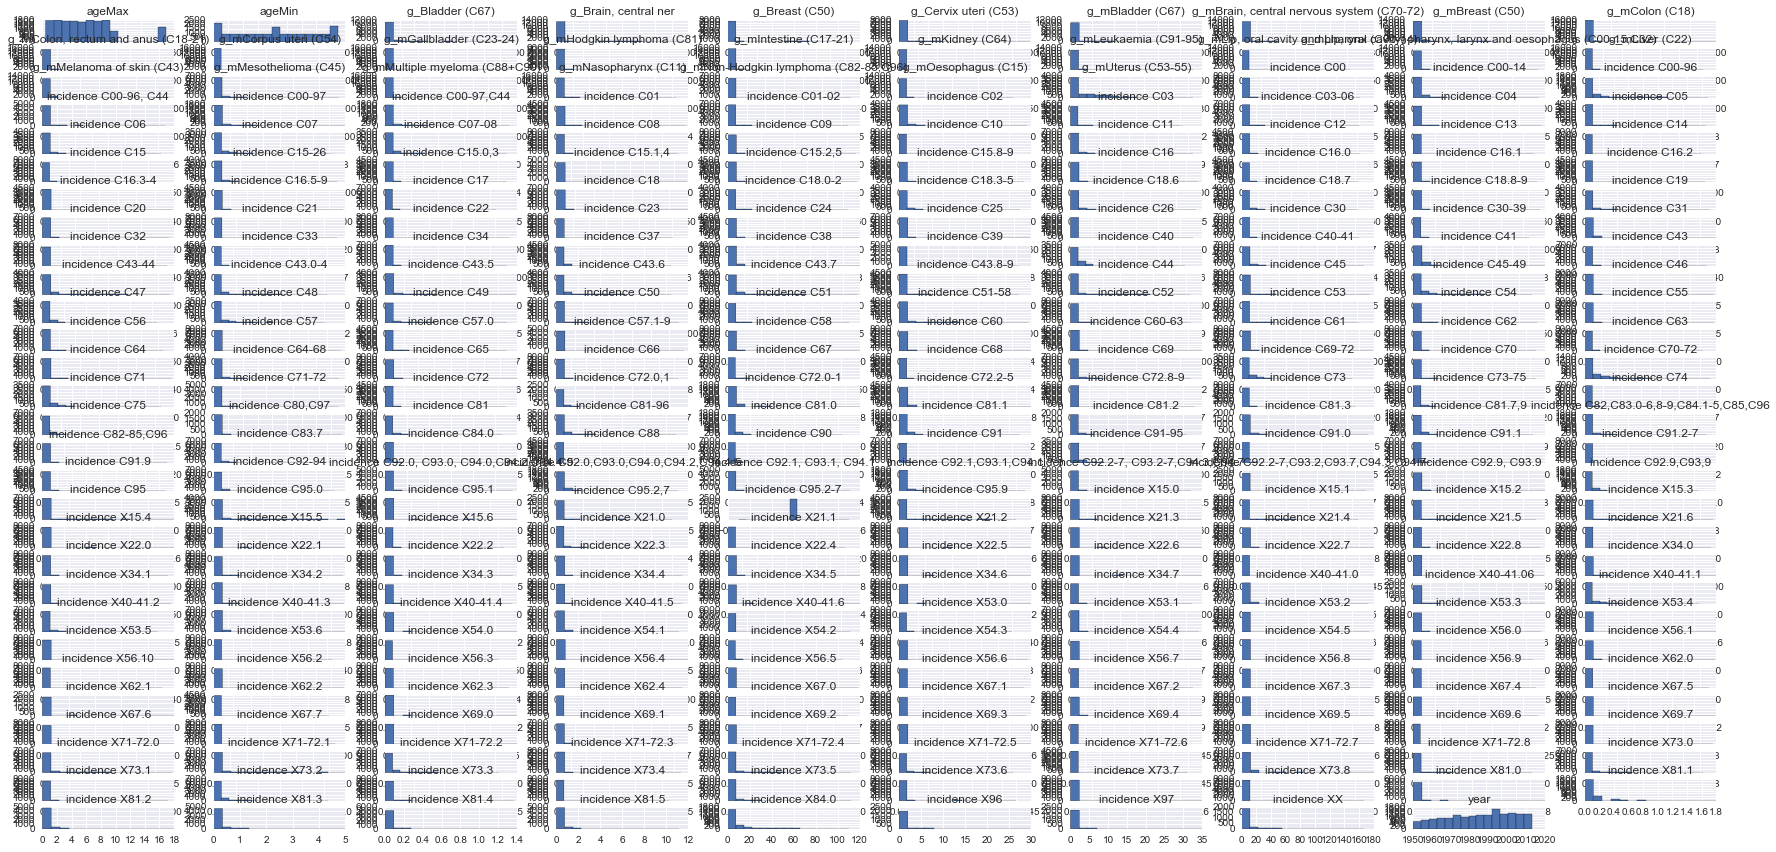

In [18]:
data_df.hist(bins=15, layout=(30, 10), figsize=(30, 15));

<h1 class="alert alert-success">The prediction model</h1>

We are going to follow the scikit-learn API specs in order to define a `FeatureExtractor` and a `Regressor`.

In [19]:
X_df = data_df.drop(target_cols, axis=1)
y = data_df[target_cols].values

More information in the [official documentation](http://scikit-learn.org/stable/developers/contributing.html#apis-of-scikit-learn-objects).

## The feature extractor

In <code>feature_extractor.py</code> you will define a class called <code>FeatureExtractor</code>. Its main <code>transform</code> method takes a pandas <b>DataFrame</b> and outputs a <b>numpy array</b>.

- The `FeatureExtractor` inherits from `TransformerMixin`.
- It implements a `fit` (optional) and a `transform` method. 

In [21]:
# %load submissions/starting_kit/feature_extractor.py
import pandas as pd
import numpy as np
from sklearn.base import TransformerMixin


class FeatureExtractor(TransformerMixin):

    def __init__(self):
        pass

    def fit(self, X_df, y):
        return self

    def transform(self, X_df):
        X_df_ = pd.get_dummies(X_df, drop_first=False, columns=['country'])
        X_df_ = pd.get_dummies(X_df_, drop_first=True, columns=['gender'])
        return X_df_.values


## The regressor

- The `Regressor` inherits from `BaseEstimator`,
- The `__init__()` function initiates all of the arguments and configurations. 
- The regressor must implement a `fit()` and  a `predict()` function.

In [ ]:
# %load submissions/starting_kit/regressor.py
from sklearn.base import BaseEstimator
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Imputer
from sklearn.ensemble import ExtraTreesRegressor


class Regressor(BaseEstimator):
    def __init__(self):
        self.reg = make_pipeline(
            Imputer(strategy='median'),
            ExtraTreesRegressor(
                n_estimators=10, max_leaf_nodes=10, random_state=61))

    def fit(self, X, y):
        return self.reg.fit(X, y)

    def predict(self, X):
        return self.reg.predict(X)


## Unit testing

It is <b><span style="color:red">important that you test your submission files before submitting them</span></b>. For this we provide a unit test. Note that the test runs on your files in [`submissions/starting_kit`](http://localhost:8890/tree/submissions/starting_kit), not on the classes defined in the cells of this notebook.

First `pip install ramp-workflow` or install it from the [github repo](https://github.com/paris-saclay-cds/ramp-workflow). Then make sure that the python files `regressor.py` and `feature_extractor.py` are in the [`submissions/starting_kit`](http://localhost:8890/tree/submissions/starting_kit) folder, and the data `train.csv.bz2` and `test.csv.bz2` are in [`data`](http://localhost:8890/tree/data). Then run

```
ramp_test_submission
```

If it runs and print training and test errors on each fold, then you can submit the code.

In [23]:
!ramp_test_submission

Testing Epidemium cancer mortality rate prediction (2nd RAMP)
Reading train and test files from ./data ...
Training ./submissions/starting_kit ...
CV fold 0
	train rmse = 54.8
	valid rmse = 68.6
	test rmse = 58.3
CV fold 1
	train rmse = 55.7
	valid rmse = 60.8
	test rmse = 54.2
CV fold 2
	train rmse = 61.4
	valid rmse = 62.0
	test rmse = 58.1
CV fold 3
	train rmse = 57.9
	valid rmse = 62.0
	test rmse = 58.8
CV fold 4
	train rmse = 59.1
	valid rmse = 60.2
	test rmse = 57.4
CV fold 5
	train rmse = 59.2
	valid rmse = 60.1
	test rmse = 58.0
CV fold 6
	train rmse = 57.8
	valid rmse = 65.9
	test rmse = 59.2
CV fold 7
	train rmse = 56.2
	valid rmse = 64.6
	test rmse = 59.6
----------------------------
train rmse = 57.8 ± 2.02
valid rmse = 63.0 ± 2.87
test rmse = 57.9 ± 1.57
----------------------------
Testing if the notebook can be converted to html
[NbConvertApp] Converting notebook ./epidemium2_cancer_mortality_starting_kit.ipynb to html
[NbConvertApp] Writing 1672281 bytes to ./epidemium2

## Submitting to [ramp.studio](http://ramp.studio)

Once you found a good feature extractor and regressor, you can submit them to [ramp.studio](http://www.ramp.studio). First, if it is your first time using RAMP, [sign up](http://www.ramp.studio/sign_up), otherwise [log in](http://www.ramp.studio/login). Then find an open event on the particular problem, for example, the event [epidemium2_cancer_mortality](http://www.ramp.studio/events/epidemium2_cancer_mortality) for this RAMP. Sign up for the event. Both signups are controled by RAMP administrators, so there **can be a delay between asking for signup and being able to submit**.

Once your signup request is accepted, you can go to your [sandbox](http://www.ramp.studio/events/epidemium2_cancer_mortality/sandbox) and copy-paste (or upload) [`feature_extractor.py`](http://localhost:8890/edit/submissions/starting_kit/feature_extractor.py) and [`regressor.py`](http://localhost:8890/edit/submissions/starting_kit/regressor.py) from `submissions/starting_kit`. Save it, rename it, then submit it. The submission is trained and tested on our backend in the same way as `ramp_test_submission` does it locally. While your submission is waiting in the queue and being trained, you can find it in the "New submissions (pending training)" table in [my submissions](http://www.ramp.studio/events/epidemium2_cancer_mortality/my_submissions). Once it is trained, you get a mail, and your submission shows up on the [public leaderboard](http://www.ramp.studio/events/epidemium2_cancer_mortality/leaderboard). 
If there is an error (despite having tested your submission locally with `ramp_test_submission`), it will show up in the "Failed submissions" table in [my submissions](http://www.ramp.studio/events/epidemium2_cancer_mortality/my_submissions). You can click on the error to see part of the trace.

After submission, do not forget to give credits to the previous submissions you reused or integrated into your submission.

The data set we use at the backend is usually different from what you find in the starting kit, so the score may be different.

The usual way to work with RAMP is to explore solutions, add feature transformations, select models, perhaps do some AutoML/hyperopt, etc., _locally_, and checking them with `ramp_test_submission`. The script prints mean cross-validation scores 
```
----------------------------
train rmse = 57.8 ± 2.02
valid rmse = 63.0 ± 2.87
test rmse = 57.9 ± 1.57
```
The official score in this RAMP (the first score column after "historical contributivity" on the [leaderboard](http://www.ramp.studio/events/epidemium2_cancer_mortality/leaderboard)) is root mean squared error ("rmse"), so the line that is relevant in the output of `ramp_test_submission` is `valid rmse = 63.0 ± 2.87`. When the score is good enough, you can submit it at the RAMP.

## More information

You can find more information in the [README](https://github.com/paris-saclay-cds/ramp-workflow/blob/master/README.md) of the [ramp-workflow library](https://github.com/paris-saclay-cds/ramp-workflow).

## Contact

Don't hesitate to [contact us](mailto:admin@ramp.studio?subject=titanic notebook).